In [1]:
import csv
import pandas as pd
import re
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
screenNames = []
Data = []
with open("chapo_sheet (1).csv") as csv_file:
    reader = csv.reader(csv_file, delimiter = ",")
    for row in reader:
        if row[1] != "":
            Data.append(row)
col_names = Data[0]
Data = Data[1:]
df = pd.DataFrame(Data, columns = col_names)

In [3]:
# Should only be run once to set up dataframe
col_drop = ["user name","location","verified?","tweet language"]
for item in col_drop:
    df = df.drop(item, axis = 1)
    
def clean_sn(name):
    return name.split("'")[1]
df["user screen name"] = df["user screen name"].map(clean_sn)

def attention(text):
    t = re.findall("@(\w*)",text)
    att = []
    for handle in t:
        att.append(handle.rstrip(":"))
    return(att)
df["att"] = df["text"].map(attention)

def retweets(text):
    if "b'RT" in str(text):
        return("retweet")
    else:
        return("tweet")
df["RT?"] = df["text"].map(retweets)

In [4]:
df

,user screen name,total followers,total friends,total listed,total favorites,total status,is this tweet a quote?,tweet retweet count,favorite count,was this a retweet?,was this favorited,id,created_at,text,att,RT?
0,Toledoooo_,387,247,0,4667,2985,FALSE,873,0,FALSE,FALSE,1.10E+18,2/13/2019 2:15,b'RT @_pachecoJA: El Chapo on his way to priso...,[_pachecoJA],retweet
1,ValerieSMartin,1613,2036,83,9703,19223,FALSE,254,0,FALSE,FALSE,1.10E+18,2/13/2019 2:15,b'RT @urbanarson: Ross Ulbricht got a double l...,[urbanarson],retweet
2,stumblinginn,20,124,0,4444,2764,FALSE,2208,0,FALSE,FALSE,1.10E+18,2/13/2019 2:15,b'RT @charliekirk11: Why don\xe2\x80\x99t we u...,[charliekirk11],retweet
3,Thumpr1982,9881,9822,10,55463,63064,FALSE,1274,0,FALSE,FALSE,1.10E+18,2/13/2019 2:15,"b""RT @TheDemCoalition: Don\xe2\x80\x99t retwee...","[TheDemCoalition, DonaldJTrumpJr]",tweet
4,PastorBlandonMo,1411,1264,14,43818,135643,FALSE,612,0,FALSE,FALSE,1.10E+18,2/13/2019 2:15,b'RT @charoguerra: Condena de cadena perpetua ...,[charoguerra],retweet
5,Marcell218,373,268,0,9572,21623,FALSE,448,0,FALSE,FALSE,1.10E+18,2/13/2019 2:15,b'RT @SenTedCruz: Ted Cruz Offers An Idea Abou...,"[SenTedCruz, dail]",retweet
6,iromerovazquez,7,40,1,5430,6304,FALSE,4,0,FALSE,FALSE,1.10E+18,2/13/2019 2:15,"b'RT @RompevientoTV: Sentencian a ""El Chapo"" G...",[RompevientoTV],retweet
7,marianaqmierd,28,77,0,1727,2902,FALSE,4761,0,FALSE,FALSE,1.10E+18,2/13/2019 2:15,b'RT @ElyangelicaNews: #ELVEREDICTO Despu\xc3\...,[ElyangelicaNews],retweet
8,MCameratta,409,353,12,22806,16694,FALSE,2208,0,FALSE,FALSE,1.10E+18,2/13/2019 2:15,b'RT @charliekirk11: Why don\xe2\x80\x99t we u...,[charliekirk11],retweet
9,DebrisYT,8,20,0,590,136,FALSE,1155,0,FALSE,FALSE,1.10E+18,2/13/2019 2:15,b'RT @tedcruz: Republican Sen. Ted Cruz of Tex...,[tedcruz],retweet


In [7]:
df2 = df[['user screen name', 'att', 'RT?']].copy()
df2.to_csv("SM_HW1_Part2df.csv",index=False)

In [6]:
att_count = {}
for i in range(1,len(df)):
    a = df.iloc[i][14]
    if a != []:
        for name in a:
            try:
                att_count[name] += 1
            except:
                att_count[name] = 1
user_followers = dict(zip(list(df["user screen name"].values),list(df["total followers"].values))) # keys - user screen name, values - listed count, followers
for k,v in user_followers.items():
    user_followers[k] = float(v)
user_listed = dict(zip(list(df["user screen name"].values),list(df["total listed"].values)))
for k,v in user_listed.items():
    user_listed[k] = float(v)

In [7]:
pairs = [] #list of tuples
# screen name -> og tweet handle -> type of tweet
for row in range(0,len(df)):
    # 0 -> name, 14 -> att names, 15-> RT bin
    # check len of attention, 0 = self
    numatt = len(df.iloc[row][14])
    if numatt == 0:
        pairs.append((df.iloc[row][0],df.iloc[row][0],"tweet"))
    else:
        for person in df.iloc[row][14]:
            pairs.append((df.iloc[row][0],person,df.iloc[row][15]))
with open("directed_tweets.csv", 'w') as csv_file:
    writer = csv.writer(csv_file, delimiter = ",")
    for row in pairs:
        writer.writerow(row)

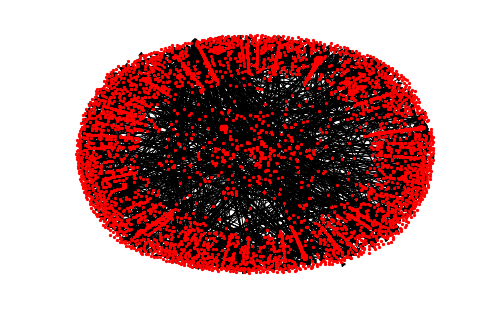

In [8]:
G = nx.DiGraph()
nodes = []
with open("directed_tweets.csv",'r') as csv_open_file:
    reader = csv.reader(csv_open_file, delimiter = ",")
    for r in reader:
        if len(r) >0:
            G.add_edge(r[0],r[1])
        
closeness = nx.closeness_centrality(G)
degree = nx.degree_centrality(G)
between = nx.betweenness_centrality(G)

nx.draw(G, node_size = 5)    

In [7]:
# from the model in part A
# most important -- listed count, followers, network 1, mentions/retweets
scoring_coef = {"A_follower_count" : 0.07248514876375266,
"A_following_count" : 0.007778086885539535,
"A_listed_count" : 0.10759730578472398,
"A_mentions_received" : 0.08584056816393516,
"A_retweets_received" : 0.07716076547803687,
"A_mentions_sent" : 0.015450044342982597,
"A_retweets_sent" : 0.009108786548097977,
"A_posts" : 0.006555558805985537,
"A_network_feature_1" : 0.09995218613343315,
"A_network_feature_2" : 0.012697464883456333,
"A_network_feature_3" : 0.01386105843931348,
"B_follower_count" : 0.07447451305759731,
"B_following_count" : 0.009208092492284546,
"B_listed_count" : 0.13327683177976185,
"B_mentions_received" : 0.07393545900210138,
"B_retweets_received" : 0.07652789329322482,
"B_mentions_sent" : 0.02070835803549135,
"B_retweets_sent" : 0.009649709504275036,
"B_posts" : 0.02049995416812142,
"B_network_feature_1" : 0.05809520467341227,
"B_network_feature_2" : 0.006537186319642621,
"B_network_feature_3" : 0.0085998234448301}

calc_coef = {"listed_count" : scoring_coef["A_listed_count"] + scoring_coef["B_listed_count"],
            "followers" : scoring_coef["A_following_count"] + scoring_coef["B_following_count"],
            "network1": scoring_coef["A_network_feature_1"] + scoring_coef["B_network_feature_1"], #degree
            "mentions": scoring_coef["A_mentions_received"] + scoring_coef["A_mentions_received"]} # att_count
weights = {}
for k,v in calc_coef.items():
    weights[k] = v/sum(calc_coef.values())

In [8]:
# just need to normalize all values going into calculation
def normalize(dict_of_values):
    norm_values = list(dict_of_values.values()) - np.mean(list(dict_of_values.values())) / np.std(list(dict_of_values.values()))
    return dict(zip(dict_of_values,norm_values))

deg_norm = normalize(degree)
att_norm = normalize(att_count)
user_listed_norm = normalize(user_listed)
user_followers_norm = normalize(user_followers)

inf_score = {}
for node in G.nodes():
    inf_score[node] = weights["network1"]*deg_norm[node]
    try:
        inf_score[node] += weights["mentions"]*att_norm[node]
    except:
        pass
    try:
        inf_score[node] += weights["listed_count"]*float(user_listed_norm[node]) + weights["followers"]*float(user_followers_norm[node])
    except:
        pass

sorted_by_inf_score = sorted(inf_score.items(), key=lambda kv: kv[1], reverse = True)[:50] # top 50
sorted_by_inf_score

[('Reuters', 632396.0752458669),
 ('el_pais', 219960.36561260966),
 ('ExpansionMx', 120422.17323544252),
 ('WRadioColombia', 108953.47061454985),
 ('noticierovv', 99868.52679394213),
 ('sopitas', 89178.12345323522),
 ('Independent', 86061.64248489117),
 ('Citytv', 79766.64668953375),
 ('latercera', 56143.577749796874),
 ('NoticiasMVS', 52644.72778361974),
 ('Excelsior', 51235.056937288275),
 ('nypost', 48517.80241796434),
 ('lobs', 41978.662293275294),
 ('LEXPRESS', 40638.16543863936),
 ('welt', 40395.2673024284),
 ('Nightline', 37843.03061366962),
 ('CaraotaDigital', 36271.58312403563),
 ('JulianRoman', 30212.873554194655),
 ('radiomitre', 26427.02425166984),
 ('Reporte_Indigo', 25382.682586448325),
 ('Tuitopsis', 18619.857937334946),
 ('abc7newsbayarea', 17545.627203521584),
 ('ruleiro', 15903.051554273916),
 ('EP_Mundo', 15255.901213763716),
 ('periodicovzlano', 14467.853552646198),
 ('nytimeses', 14190.502213124335),
 ('DiarioLaPrensa', 13177.379278766359),
 ('sdpnoticias', 11549.0